In [1]:
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 20)
pd.set_option("display.precision", 2)

In [4]:
## 改一下架構, base class is player

CHECK = 0
def pprint(message):
    '''Print with/without "CHECK"
    Args: 
        message: string
    Returns:

    Raises:
    
    Description:
        Remember to set global variable CHECK, when CHECK = True (1), it prints
    '''
    if CHECK:
        print(message)


class Player(object):
    
    def __init__(self, name = '', money = 10000, bet_min=1, bet_max=50):
        '''賭場玩家的基本物件
        Args: 
            名字 (name, String)
            錢錢 (money, integer)
            最低賭注 (bet_min, integer)
            最高賭注 (bet_max, integer)
        Returns:
            Player 物件
        Raises:

        Description:
            Other key infos
            self.name = name
            self.money = money
            self.bet_min = bet_min
            self.bet_max = bet_max
            self.cards = []
            self.cards_no = 0 
            self.cards_sum = 0
            self.bet = 0  賭注
            self.hit = 0  是否叫牌
            self.split = 0  是否分牌
            self.white_flag = 0  舉白旗
            self.wins = 0   贏的局數
            self.loses = 0  輸的局數
            self.note = '最基本邏輯，不動注，17以下加牌'
        '''
        self.name = name
        self.money = money
        self.bet_min = bet_min
        self.bet_max = bet_max
        self.cards = []
        self.cards_no = 0
        self.cards_sum = 0
        self.bank_card = []
        self.bet = 0
        self.hit = 0
        self.split = 0
        self.white_flag = 0
        self.wins = 0
        self.loses = 0
        self.note = '最基本邏輯，不動注，17以下加牌'
        
    def receive_cards(self, cards):
        """Must be a list
        """
        for card in cards:
            self.cards.append(card)   
            self.cards_no += 1
            
        self.get_hit()
        
    def set_bet(self):
        # 如果有很厲害的演算法，可以寫在這裏
        # 不然就是用這招…最低的賭注
        self.bet = int(self.bet_min)
        
    def get_hit(self):
        # 叫牌
        # 如果有很厲害的演算法，可以寫在這裏
        self.count_no()
        
        if self.cards_sum < 17:
            self.hit = 1
        else:
            self.hit = 0
            
        return self.hit
    
    def count_no(self):
        s_no = 0
        no = 0
        for card in self.cards:
            if card == 'A':
                s_no += 1
                no += 11   # default
            elif card == 'J' or card == 'Q' or card == 'K':
                no += 10
            else:
                no += int(card)
                
        while s_no:
            if no > 21:
                no -= 10
            s_no -= 1
                
        self.cards_sum = no
        
    def win(self, num):
        self.money += num
        self.wins += 1
        # self.new_game()
        
    def lose(self, num):
        self.money -= num
        self.loses += 1
        # self.new_game()
        
    def new_game(self):
        self.cards = []
        self.cards_no = 0
        self.cards_sum = 0
        self.hit = 0
        self.set_bet()
        
class Bank(Player):
    
    def __init__(self):
        super().__init__(name='bigboss')
        self.money = 50000
        self.note = '最基本邏輯，17以下加牌'
        
    def get_hit(self):
        # 叫牌
        # 17點以下加牌
        self.count_no()
        
        if self.cards_sum < 17:
            self.hit = 1
        else:
            self.hit = 0
            
        return self.hit


class Deck(object):
    def __init__(self, num_decks = 1):
        '''紙牌的基本物件
        Args: 
            幾幅牌 (num_decks, integer) default is 1
        Returns:
            Deck object
        Raises:
            N/A
        Description:
            self.card_type = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
            self.card_per_type = 4
            self.num_decks = int(num_decks)
            self.deck_real = []
            self.deck_count = {}
            self.total_deck_left = 0
            
            Basic Functions:
            to make a new deck, self.make_deck()
            deliver card, self.send_card()
            to check if a new deck be prepared, self.check_new_deck(num) - num, integer should be given
        '''
        
        self.card_type = ['A','2','3','4','5','6','7','8','9','10','J','Q','K']
        self.card_per_type = 4
        self.num_decks = int(num_decks)
        self.deck_real = []
        self.deck_count = {}
        self.total_deck_left = 0
        self.CHECK = 0
        self.make_deck()
        
    def send_card(self):
        card = self.deck_real[0]
        self.deck_real.pop(0)
        self.deck_count[card] = self.deck_count[card] -1
        self.total_deck_left = self.total_deck_left -1
        return [card]
        
    def check_new_deck(self, num):
        if self.total_deck_left > (5*num):
            return
        else:
            if self.CHECK:
                print('Deck Left: '+ str(self.total_deck_left) +  '. Let us make a New Deck!!')
            self.make_deck()
        
    def make_deck(self):
        new_deck = []
        for i in range(self.num_decks):
            for j in range(self.card_per_type):
                new_deck.extend(self.card_type)
        self.deck_real = new_deck
        self.shuffle_deck()
        self.make_deck_count()
        self.total_deck_left = int(len(self.card_type)*self.num_decks*self.card_per_type)
    
    def make_deck_count(self):
        new_deck_count = {}
        for c in self.card_type:
            new_deck_count[c] = self.card_per_type * self.num_decks
        self.deck_count = new_deck_count
    
    def shuffle_deck(self):
        """Shuffle
        """
        random.shuffle(self.deck_real)
        
class House(object):
    
    def __init__(self, players, bank, num_decks=1, bet_min = 1, bet_max = 50):
        self.players = players
        self.player_num = len(players)
        self.bank = bank
        self.deck = Deck(num_decks=num_decks)
        self.bet_min = bet_min
        self.bat_max = bet_max
        self.player_blackjack_times = 1.5
        self.records = []
        self.CHECK = 0
        
        self.check_bet_minmax()
    
    def check_bet_minmax(self):
        for i in range(self.player_num):
            if self.bet_min > self.players[i].bet_min:
                self.players[i].bet_min = self.bet_min
            if self.players[i].bet_max > self.bat_max:
                self.players[i].bet_max = self.bat_max
    
    def playBJ(self, round = 1):
        for i in range(round):
            self.deliver_cards()
            self.hit()
            self.winlose()
            if self.CHECK:
                print('CHECK: This is round: ' + str(i+1))
                self.deck.CHECK = 1
                self.check_onhand()
            self.new_game()
        
    def deliver_cards(self):
        for i in range(self.player_num):
            self.players[i].receive_cards(self.deck.send_card())
        # Bank 的明牌要發給所有的 player
        card = self.deck.send_card()
        self.bank.receive_cards(card)
        # 在下一次發牌時順便給到 players
        for i in range(self.player_num):
            self.players[i].bank_card = card
            self.players[i].receive_cards(self.deck.send_card())
        # Bank 第二張是暗牌
        self.bank.receive_cards(self.deck.send_card())
        
    def check_onhand(self):
        for i in range(self.player_num):
            print(self.players[i].name + ', cards:' + str(self.players[i].cards) +', sum=' + str(self.players[i].cards_sum) +', money=' +str(self.players[i].money))
        # 莊家
        print(self.bank.name + ', cards:' + str(self.bank.cards) +', sum=' + str(self.bank.cards_sum) +', money=' +str(self.bank.money))
        
    def check_result(self):
        for i in range(self.player_num):
            print(self.players[i].note)
            print(self.players[i].name + ', wins:' + str(self.players[i].wins) +', loses=' + str(self.players[i].loses) + ', win%=' + 
                  '{:.3f}'.format(self.players[i].wins / (self.players[i].wins+self.players[i].loses)) + ', money=' + str(self.players[i].money))
        # 莊家
        print(self.bank.note)
        print(self.bank.name + ', wins:' + str(self.bank.wins) +', loses=' + str(self.bank.loses) + ', win%=' + 
              '{:.3f}'.format(self.bank.wins / (self.bank.wins+self.bank.loses)) + ', money=' + str(self.bank.money))
        
        
    def hit(self):
        # 下注，順變偷看看牌，接下來要牌
        for i in range(self.player_num):
            self.players[i].set_bet()
            
            while self.players[i].get_hit():
                self.players[i].receive_cards(self.deck.send_card())

        # 換莊家要牌
        while self.bank.get_hit():
            self.bank.receive_cards(self.deck.send_card())
            
    def winlose(self):
            # 比大小，算錢

        for i in range(self.player_num):
            # Player 先曝
            if self.players[i].cards_sum > 21:
                self.players[i].lose(self.players[i].bet)
                self.bank.win(self.players[i].bet)

            elif self.players[i].cards_sum == 21 and len(self.players[i].cards) == 2:
                # 玩家天成
                if self.bank.cards_sum == 21 and len(self.bank.cards) ==2:
                    # 莊家也天成，打平
                    pass
                else:
                    # 莊家沒天成，賠 1.5X
                    self.players[i].win(int(self.players[i].bet * self.player_blackjack_times))
                    self.bank.lose(int(self.players[i].bet * self.player_blackjack_times))

            elif self.bank.cards_sum == 21 and len(self.bank.cards) == 2:
                # 莊家天成
                self.bank.win(self.players[i].bet)
                self.players[i].lose(self.players[i].bet)

            elif self.bank.cards_sum > 21:
                # 莊家曝
                self.players[i].win(self.players[i].bet)
                self.bank.lose(self.players[i].bet)
                
            elif len(self.players[i].cards) == 5:
                # 都沒曝，玩家五張牌，自動贏兩倍
                self.players[i].win(int(2* self.players[i].bet))
                self.bank.lose(int(2* self.players[i].bet))

            elif self.bank.cards_sum > self.players[i].cards_sum:
                # 都沒曝且莊家大
                self.bank.win(self.players[i].bet)
                self.players[i].lose(self.players[i].bet)

            elif self.bank.cards_sum < self.players[i].cards_sum:
                # 都沒曝且莊家小
                self.players[i].win(self.players[i].bet)
                self.bank.lose(self.players[i].bet)

            elif self.bank.cards_sum == self.players[i].cards_sum:
                # 都沒曝且平手
                pass
            else:
                # 搞不清楚狀況
                print('Error Player: ' + str(self.players[i].cards_sum) + ' , Bigboss: ' + str(self.bank.cards_sum))
        
    def new_game(self):
        # 記錄並更新
        record = []
        for i in range(self.player_num):
            record.append(self.players[i].cards)
            self.players[i].new_game()
        record.append(self.bank.cards)
        self.bank.new_game()
        self.records.append(record)
        self.deck.check_new_deck(self.player_num)

# 主要程式部份

In [5]:
# 標準版
num_players = 4
bigboss = Bank()
players = []
for i in range(num_players):
    pl = Player()
    pl.name = 'Basic'+str(i+1)
    players.append(pl)
    
myHouse = House(players, bigboss, num_decks=2)
myHouse.CHECK = 0

myHouse.playBJ(30000)
myHouse.check_result()

最基本邏輯，不動注，17以下加牌
Basic1, wins:12460, loses=14709, win%=0.459, money=8017
最基本邏輯，不動注，17以下加牌
Basic2, wins:12794, loses=14327, win%=0.472, money=8764
最基本邏輯，不動注，17以下加牌
Basic3, wins:12579, loses=14533, win%=0.464, money=8332
最基本邏輯，不動注，17以下加牌
Basic4, wins:12588, loses=14649, win%=0.462, money=8215
最基本邏輯，17以下加牌
bigboss, wins:58218, loses=50421, win%=0.536, money=56672


In [57]:
myHouse.records[0][0][0:2]

['8', '2']

# 玩家基礎策略

## 單純 <17 莊勝 53.7%

測試次數：20000 次，四玩家的平均結果

結果：玩家有 4-5% 劣勢

玩家變多，不影響單玀勝率，但莊家賺錢的速度變快

In [7]:
class Player_new(Player):
    def __init__(self):
        super().__init__()
        self.note = '最基本邏輯，不動注，15以下加牌'
    
    def get_hit(self):
        # 叫牌
        # 15點以下加牌
        self.count_no()
        
        if self.cards_sum < 16:
            self.hit = 1
        else:
            self.hit = 0
            
        return self.hit

In [8]:
# 測試不同叫牌 level 是否產生差異
num_players = 4
bigboss = Bank()
players = []
for i in range(num_players):
    pl = Player_new()
    pl.name = 'Testing '+str(i+1)
    players.append(pl)
    
myHouse = House(players, bigboss, num_decks=2)
myHouse.CHECK = 0

myHouse.playBJ(30000)
myHouse.check_result()

最基本邏輯，不動注，15以下加牌
Testing 1, wins:12678, loses=14674, win%=0.464, money=8198
最基本邏輯，不動注，15以下加牌
Testing 2, wins:12508, loses=14758, win%=0.459, money=7947
最基本邏輯，不動注，15以下加牌
Testing 3, wins:12640, loses=14801, win%=0.461, money=8056
最基本邏輯，不動注，15以下加牌
Testing 4, wins:12678, loses=14686, win%=0.463, money=8192
最基本邏輯，17以下加牌
bigboss, wins:58919, loses=50504, win%=0.538, money=57607


## 單純 <16 加牌 莊勝53.8%

## 單純 <15 加牌 莊勝53.7%

## 單純 <14 加牌 莊勝54.1%

## 單純 <13 加牌 莊勝55.0%

In [151]:
len(myHouse.records)

30000

In [9]:
num_players = 4

pl = Player()
pl.name = 'Reviewer'

dic = {'Bank_Card':['2','3','4','5','6','7','8','9','10','J','Q','K','A'],
       'Plays':[0,0,0,0,0,0,0,0,0,0,0,0,0],
       'Wins':[0,0,0,0,0,0,0,0,0,0,0,0,0],
       'Loses':[0,0,0,0,0,0,0,0,0,0,0,0,0],
       'Equals':[0,0,0,0,0,0,0,0,0,0,0,0,0],
      }
records = pd.DataFrame(dic)
records.set_index('Bank_Card', inplace=True)

for i in range(len(myHouse.records)):
    # 莊家
    pl.cards = myHouse.records[i][num_players]
    seen = pl.cards[0]
    pl.count_no()
    bank_cards_num = pl.cards_sum
    # print(seen, bank_cards_num)

    for j in range(num_players):
        pl.cards = myHouse.records[i][j]
        pl.count_no()
        pl_cards_num = pl.cards_sum

        # print(pl_cards_num)

        if pl_cards_num > 21:
            records.loc[seen]['Plays'] = records.loc[seen]['Plays'] + 1
            records.loc[seen]['Wins'] = records.loc[seen]['Wins'] + 1
        elif bank_cards_num > 21:
            records.loc[seen]['Plays'] = records.loc[seen]['Plays'] + 1
            records.loc[seen]['Loses'] = records.loc[seen]['Loses'] + 1
        elif pl_cards_num > bank_cards_num:
            records.loc[seen]['Plays'] = records.loc[seen]['Plays'] + 1
            records.loc[seen]['Loses'] = records.loc[seen]['Loses'] + 1
        elif pl_cards_num < bank_cards_num:
            records.loc[seen]['Plays'] = records.loc[seen]['Plays'] + 1
            records.loc[seen]['Wins'] = records.loc[seen]['Wins'] + 1
        elif pl_cards_num == bank_cards_num:
            records.loc[seen]['Plays'] = records.loc[seen]['Plays'] + 1
            records.loc[seen]['Equals'] = records.loc[seen]['Equals'] + 1
        else:
            print('Something we dont know')

In [10]:
records['Win_Rate'] = records['Wins'] / (records['Wins'] + records['Loses'])
records

,Plays,Wins,Loses,Equals,Win_Rate
Bank_Card,,,,,
2,9228,4178,4249,801,0.50
3,9268,4134,4362,772,0.49
4,9548,4290,4466,792,0.49
5,9200,3901,4578,721,0.46
6,9300,4073,4489,738,0.48
7,9264,3854,4511,899,0.46
8,9428,4206,4314,908,0.49
9,9024,4457,3669,898,0.55
10,8976,4938,3025,1013,0.62


## 莊家明牌 v.s. 勝率

不算平局的情況下

莊家的明牌 5/6/7，輸的機率偏高，勝率46%

莊家明牌 9 勝率55%

莊家明牌 10/J/Q/K 勝率61.5%

莊家明牌 A 勝率71%

In [44]:
# 改變下注策略呢?

class Player_betman(Player):
    def __init__(self):
        super().__init__()
        self.note = '正常基礎注 X 2，按照莊家明牌加減注'
        self.bet = self.bet_min
    

    def set_bet(self):
        # 如果有很厲害的演算法，可以寫在這裏
        # 不然就是用這招…最低的賭注
        self.bet = int(self.bet_min * 2)
        
    def get_hit(self):
        # 叫牌加注策略在這裏
        # 先看加減注
        if self.bank_card == ['A'] or self.bank_card == ['10'] or self.bank_card == ['K'] or self.bank_card == ['Q'] or self.bank_card == ['J']:
            self.bet = int(self.bet / 2)
        elif self.bank_card == ['4'] or self.bank_card == ['5'] or self.bank_card == ['6'] or self.bank_card == ['7'] :
            self.bet = int(self.bet * 5)        
        
        self.count_no()
        
        if self.cards_sum < 14:
            self.hit = 1
        else:
            self.hit = 0
            
        return self.hit

In [45]:
# Betman, 靠…那麼強…莊家大輸

num_players = 4
bigboss = Bank()
players = []
for i in range(num_players):
    pl = Player_betman()
    pl.name = 'Testing '+str(i+1)
    players.append(pl)
    
myHouse = House(players, bigboss, num_decks=2)
myHouse.CHECK = 0

myHouse.playBJ(30000)
myHouse.check_result()

正常基礎注 X 2，按照莊家明牌加減注
Testing 1, wins:12788, loses=15027, win%=0.460, money=294875
正常基礎注 X 2，按照莊家明牌加減注
Testing 2, wins:12758, loses=15029, win%=0.459, money=3619268
正常基礎注 X 2，按照莊家明牌加減注
Testing 3, wins:12713, loses=15043, win%=0.458, money=8561607
正常基礎注 X 2，按照莊家明牌加減注
Testing 4, wins:12770, loses=14989, win%=0.460, money=2430659
最基本邏輯，17以下加牌
bigboss, wins:60088, loses=51029, win%=0.541, money=-14816409


In [8]:
myHouse.deck.total_deck_left

8

In [15]:
num_players = 5
bigboss = Bank()
players = []
for i in range(num_players):
    players.append(Player(name='Player' + str(i+1)))
    
myHouse = House(players, bigboss, num_decks=2)
myHouse.CHECK = 0

myHouse.playBJ(10000)
myHouse.check_result()

Player1, wins:4055, loses=4991, win%=0.448, money=155
Player2, wins:4034, loses=4978, win%=0.448, money=139
Player3, wins:4104, loses=4999, win%=0.451, money=198
Player4, wins:4139, loses=4917, win%=0.457, money=332
Player5, wins:4108, loses=4935, win%=0.454, money=242
bigboss, wins:24820, loses=20440, win%=0.548, money=8934


In [24]:
# 在四人的玩家裏，加入策略不同的玩家

num_players = 4
bigboss = Bank()
players = []
for i in range(num_players-1):
    players.append(Player(name='Player' + str(i+1)))
    
p15 = Player_15()
p15.name = 'P15'
players.append(p15)
    
myHouse = House(players, bigboss, num_decks=2)
myHouse.CHECK = 0

myHouse.playBJ(10000)
myHouse.check_result()

Player1, wins:6286, loses=7262, win%=0.464, money=147
Player2, wins:6255, loses=7294, win%=0.462, money=115
Player3, wins:6275, loses=7380, win%=0.460, money=23
P15, wins:6366, loses=7428, win%=0.462, money=10
bigboss, wins:29364, loses=25182, win%=0.538, money=8705


In [150]:
players

# 數學與期望值

## 為什麼玩家有劣勢?

因為先手，有一定比例先爆的機率

In [58]:
# 拿一幅牌來算

dd = Deck(num_decks=1)
p = Player(name='Statistist')

# 做一個 陣列 [[牌], 點, 機率]，先從第一階開始
L1 = []


In [59]:
for i in range(len(dd.card_type)):
    card = [dd.card_type[i]]
    p.cards = card
    p.count_no()
    point = p.cards_sum
    possibility = 1/13
    L1.append([card, point, possibility])
L1

[[['A'], 11, 0.07692307692307693],
 [['2'], 2, 0.07692307692307693],
 [['3'], 3, 0.07692307692307693],
 [['4'], 4, 0.07692307692307693],
 [['5'], 5, 0.07692307692307693],
 [['6'], 6, 0.07692307692307693],
 [['7'], 7, 0.07692307692307693],
 [['8'], 8, 0.07692307692307693],
 [['9'], 9, 0.07692307692307693],
 [['10'], 10, 0.07692307692307693],
 [['J'], 10, 0.07692307692307693],
 [['Q'], 10, 0.07692307692307693],
 [['K'], 10, 0.07692307692307693]]

In [33]:
df = pd.DataFrame(L1)
df.columns

RangeIndex(start=0, stop=3, step=1)

In [34]:
columns = {0:'cards', 1:'number', 2:'possibility'}
df.rename(columns=columns, inplace=True)
df = df.drop(axis=1, columns=['cards'])
nums = df.number.unique()

In [35]:
nums

array([11,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [50]:
result=pd.DataFrame()

In [51]:
result['l1_numbers'] = nums

In [52]:
possibility = []
for num in nums:
    p = df[df['number']==num].sum()['possibility']
    possibility.append(p)
possibility

[0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.07692307692307693,
 0.3076923076923077]

In [53]:
result['possibility'] = np.array(possibility)

In [56]:
result.describe()

,l1_numbers,possibility
count,10.00,10.00
mean,6.50,0.10
std,3.03,0.07
min,2.00,0.08
25%,4.25,0.08
50%,6.50,0.08
75%,8.75,0.08
max,11.00,0.31


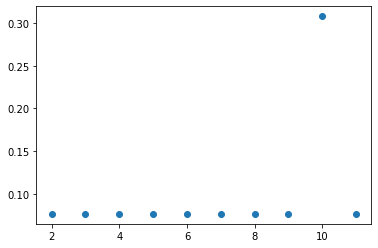

In [55]:
plt.scatter(result.l1_numbers, result.possibility)

## 每張牌的機率

> 除了 10 點，每一個點數的機率是 7.7% 這是很簡單的數學，因為 100%/13

> 但分布就很有趣了，永遠要記得，10 出現的機率超級高，佔 30.8% 

In [67]:
# 第二階

# 重新拿一幅牌來算

dd = Deck(num_decks=1)
p = Player(name='Statistist')

L2 = []
for j in range(len(dd.card_type)):
    for i in range(len(dd.card_type)):
        card1 = dd.card_type[j]
        card2 = dd.card_type[i]
        card = [dd.card_type[j], dd.card_type[i]]
        p.cards = card
        p.count_no()
        point = p.cards_sum
        
        if card1 == card2:
            possibility = 4/52*3/51
        else:
            possibility = 4/52*4/51

        L2.append([card, point, possibility])

In [68]:
# 驗算總機率是不是 1

total_possibility = 0.0

for i in range(len(L2)):
    total_possibility += L2[i][2]
    
total_possibility

0.9999999999999976

In [69]:
df = pd.DataFrame(L2)
df.columns

RangeIndex(start=0, stop=3, step=1)

In [70]:
columns = {0:'cards', 1:'number', 2:'possibility'}
df.rename(columns=columns, inplace=True)
df.head()

,cards,number,possibility
0,"[A, A]",12,4.52e-03
1,"[A, 2]",13,6.03e-03
2,"[A, 3]",14,6.03e-03
3,"[A, 4]",15,6.03e-03
4,"[A, 5]",16,6.03e-03


In [66]:
df.info

<bound method DataFrame.info of         cards  number  possibility
0      [A, A]      12     4.52e-03
1      [A, 2]      13     6.03e-03
2      [A, 3]      14     6.03e-03
3      [A, 4]      15     6.03e-03
4      [A, 5]      16     6.03e-03
5      [A, 6]      17     6.03e-03
6      [A, 7]      18     6.03e-03
7      [A, 8]      19     6.03e-03
8      [A, 9]      20     6.03e-03
9     [A, 10]      21     6.03e-03
10     [A, J]      21     6.03e-03
11     [A, Q]      21     6.03e-03
12     [A, K]      21     6.03e-03
13     [2, A]      13     6.03e-03
14     [2, 2]       4     4.52e-03
15     [2, 3]       5     6.03e-03
16     [2, 4]       6     6.03e-03
17     [2, 5]       7     6.03e-03
18     [2, 6]       8     6.03e-03
19     [2, 7]       9     6.03e-03
20     [2, 8]      10     6.03e-03
21     [2, 9]      11     6.03e-03
22    [2, 10]      12     6.03e-03
23     [2, J]      12     6.03e-03
24     [2, Q]      12     6.03e-03
25     [2, K]      12     6.03e-03
26     [3, A]      14  

In [71]:
df = df.drop(axis=1, columns=['cards'])

In [72]:
nums = df.number.unique()
nums

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21,  4,  5,  6,  7,  8,  9, 10,
       11], dtype=int64)

In [75]:
possibility = []
for num in nums:
    p = df[df['number']==num].sum()['possibility']
    possibility.append(p)

In [76]:
result=pd.DataFrame()

In [77]:
result['l2_numbers'] = nums
result

,l2_numbers
0,12
1,13
2,14
3,15
4,16
5,17
6,18
7,19
8,20
9,21


In [78]:
result['possibility'] = np.array(possibility)

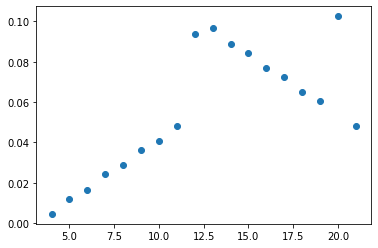

In [79]:
plt.scatter(result['l2_numbers'], result['possibility'])

## 玩家兩張牌的點數分布

> 4-10 點，機率 < 5%

> 11,21，機率約為 5%

> 12, 13, 14, 20 都屬於高機率，尤其 20 點，大約佔 10%

> 15 - 19 機率慢慢從 8% - 6%


# 用貝式定理猜莊家點數

貝氏定理（英語：Bayes' theorem）是機率論中的一個定理，描述在已知一些條件下，某事件的發生機率。比如，如果已知某人媽媽得癌症與壽命有關，使用貝氏定理則可以通過得知某人年齡，來更加準確地計算出他媽媽罹患癌症的機率。

通常，事件A在事件B已發生的條件下發生的機率，與事件B在事件A已發生的條件下發生的機率是不一樣的。然而，這兩者是有確定的關係的，貝氏定理就是這種關係的陳述。貝氏公式的一個用途，即透過已知的三個機率而推出第四個機率。貝氏定理跟隨機變數的條件機率以及邊際機率分布有關。

正常 21 點，莊家有一張「明牌」，假設是發給莊家的第一張牌，我們可以用貝式定理，從明牌反推點數的發生機率

In [257]:
# 第二階

# 重新拿一幅牌來算

dd = Deck(num_decks=1)
p = Player(name='Statistist')

L2 = []
for j in range(len(dd.card_type)):
    for i in range(len(dd.card_type)):
        card1 = dd.card_type[j]
        card2 = dd.card_type[i]
        card = [dd.card_type[j], dd.card_type[i]]
        p.cards = card
        p.count_no()
        point = p.cards_sum
        
        if card1 == card2:
            possibility = 4/52*3/51
        else:
            possibility = 4/52*4/51

        L2.append([card, point, possibility])

In [258]:
df = pd.DataFrame(L2)
columns = {0:'cards', 1:'number', 2:'possibility'}
df.rename(columns=columns, inplace=True)
df.head()

,cards,number,possibility
0,"[A, A]",12,4.52e-03
1,"[A, 2]",13,6.03e-03
2,"[A, 3]",14,6.03e-03
3,"[A, 4]",15,6.03e-03
4,"[A, 5]",16,6.03e-03


In [86]:
for light, dark in df['cards']:
    print(light)

A
A
A
A
A
A
A
A
A
A
A
A
A
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
J
J
J
J
J
J
J
J
J
J
J
J
J
Q
Q
Q
Q
Q
Q
Q
Q
Q
Q
Q
Q
Q
K
K
K
K
K
K
K
K
K
K
K
K
K


In [259]:
# 在 pd 裏操作是這樣
df['card_seen'] = np.array([x for [x,y] in df['cards']])

In [263]:
df.groupby(by=['card_seen','number']).possibility.sum()

card_seen  number
10         12        6.03e-03
           13        6.03e-03
           14        6.03e-03
           15        6.03e-03
           16        6.03e-03
           17        6.03e-03
           18        6.03e-03
           19        6.03e-03
           20        2.26e-02
           21        6.03e-03
2          4         4.52e-03
           5         6.03e-03
           6         6.03e-03
           7         6.03e-03
           8         6.03e-03
           9         6.03e-03
           10        6.03e-03
           11        6.03e-03
           12        2.41e-02
           13        6.03e-03
3          5         6.03e-03
           6         4.52e-03
           7         6.03e-03
           8         6.03e-03
           9         6.03e-03
           10        6.03e-03
           11        6.03e-03
           12        6.03e-03
           13        2.41e-02
           14        6.03e-03
4          6         6.03e-03
           7         6.03e-03
           8         4

In [99]:
df.groupby(by=['card_seen', 'number']).describe()

possibility                                          \
                       count      mean       std       min       25%   
card_seen number                                                       
10        12             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          13             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          14             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          15             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          16             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          17             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          18             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          19             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          20             4.0  5.66e-03  7.54e-04  4.52e-03  5.66e-03   
          21             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
2         4              1.0  4.52e-03       NaN  4.52e-03  4.52e-03   
          5              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          6              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          7              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          8              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          9              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          10             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          11             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          12             4.0  6.03e-03  0.00e+00  6.03e-03  6.03e-03   
          13             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
3         5              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          6              1.0  4.52e-03       NaN  4.52e-03  4.52e-03   
          7              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          8              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          9              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          10             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          11             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          12             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          13             4.0  6.03e-03  0.00e+00  6.03e-03  6.03e-03   
          14             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
4         6              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          7              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          8              1.0  4.52e-03       NaN  4.52e-03  4.52e-03   
          9              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          10             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          11             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          12             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          13             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          14             4.0  6.03e-03  0.00e+00  6.03e-03  6.03e-03   
          15             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
5         7              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          8              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          9              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          10             1.0  4.52e-03       NaN  4.52e-03  4.52e-03   
          11             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          12             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          13             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          14             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          15             4.0  6.03e-03  0.00e+00  6.03e-03  6.03e-03   
          16             1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
6         8              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          9              1.0  6.03e-03       NaN  6.03e-03  6.03e-03   
          10             1.0  6.03e-03       NaN  6.03e-0

## 莊家明牌+8-10(50%)

上述的表格顯示，不論明牌是多少，在沒有算牌的情況下，有 50% 的機率是在 +8 以上，而 ~30% 的機率是 +10

如果你的總點數 16，莊家明牌是 8，代表什麼意義??

## 每種牌 7.5%


In [264]:
# 第二階

# 重新拿一幅牌來算

dd = Deck(num_decks=1)
p = Player(name='Statistist')

L2 = []
for j in range(len(dd.card_type)):
    for i in range(len(dd.card_type)):
        card1 = dd.card_type[j]
        card2 = dd.card_type[i]
        card = [dd.card_type[j], dd.card_type[i]]
        p.cards = card
        p.count_no()
        point = p.cards_sum
        
        if card1 == card2:
            possibility = 4/52*3/51
        else:
            possibility = 4/52*4/51

        L2.append([card1, card, point, possibility])
df = pd.DataFrame(L2)
columns = {0:'1st_card', 1: 'cards', 2:'number', 3:'possibility'}
df.rename(columns=columns, inplace=True)
df.head(10)

,1st_card,cards,number,possibility
0,A,"[A, A]",12,4.52e-03
1,A,"[A, 2]",13,6.03e-03
2,A,"[A, 3]",14,6.03e-03
3,A,"[A, 4]",15,6.03e-03
4,A,"[A, 5]",16,6.03e-03
5,A,"[A, 6]",17,6.03e-03
6,A,"[A, 7]",18,6.03e-03
7,A,"[A, 8]",19,6.03e-03
8,A,"[A, 9]",20,6.03e-03
9,A,"[A, 10]",21,6.03e-03


In [266]:
data = df.copy()

In [265]:
df.groupby(by=['1st_card','number']).possibility.sum()

1st_card  number
10        12        6.03e-03
          13        6.03e-03
          14        6.03e-03
          15        6.03e-03
          16        6.03e-03
          17        6.03e-03
          18        6.03e-03
          19        6.03e-03
          20        2.26e-02
          21        6.03e-03
2         4         4.52e-03
          5         6.03e-03
          6         6.03e-03
          7         6.03e-03
          8         6.03e-03
          9         6.03e-03
          10        6.03e-03
          11        6.03e-03
          12        2.41e-02
          13        6.03e-03
3         5         6.03e-03
          6         4.52e-03
          7         6.03e-03
          8         6.03e-03
          9         6.03e-03
          10        6.03e-03
          11        6.03e-03
          12        6.03e-03
          13        2.41e-02
          14        6.03e-03
4         6         6.03e-03
          7         6.03e-03
          8         4.52e-03
          9         6.03e-

In [275]:
i = '6'
p = data[data['1st_card'] == i].sum()['possibility']
d1 = data[data['1st_card'] == i]
d2 = d1.reset_index(drop=True)
s = d2.shape[0]
print('第一張點數為 ', i, ' 時，總組合有 ', s , ' 種, Possibility = ', p)
d2['sub_p'] = d2['possibility'] / (np.zeros((s,))+p)
display(d2.groupby(by=['number'], sort=True).sub_p.sum())

第一張點數為  6  時，總組合有  13  種, Possibility =  0.07692307692307694


number
8     0.08
9     0.08
10    0.08
11    0.08
12    0.06
13    0.08
14    0.08
15    0.08
16    0.31
17    0.08
Name: sub_p, dtype: float64

## A,BJ:31%, >=17:63%

## 10, BJ:8%, >=17:62%

## 9, >=17:52%

## 8, >=17:47%

## 7, >=17:39%

## 6, >=17:8%, 13-16:55%, 玩家勝率最高

# Level 3

In [148]:
# 重新拿一幅牌來算

dd = Deck(num_decks=1)
p = Player(name='Statistist')

L3 = []
for k in range(len(dd.card_type)):
    for j in range(len(dd.card_type)):
        for i in range(len(dd.card_type)):
            card1 = dd.card_type[k]
            card2 = dd.card_type[j]
            card3 = dd.card_type[i]
            card = [dd.card_type[k],dd.card_type[j], dd.card_type[i]]
            p.cards = card
            p.count_no()
            point = p.cards_sum

            if card1 == card2 and card2==card3:
                possibility = 4/52*3/51*2/50
            elif card1 == card2 or card2 == card3 or card1 == card3:
                passibility = 4/52*3/51*4/50
            else:
                possibility = 4/52*4/51*4/50

            L3.append([card, point, possibility])
            
df = pd.DataFrame(L3)
columns = {0:'cards', 1:'number', 2:'possibility'}
df.rename(columns=columns, inplace=True)
df.head(10)

,cards,number,possibility
0,"[A, A, A]",13,1.81e-04
1,"[A, A, 2]",14,1.81e-04
2,"[A, A, 3]",15,1.81e-04
3,"[A, A, 4]",16,1.81e-04
4,"[A, A, 5]",17,1.81e-04
5,"[A, A, 6]",18,1.81e-04
6,"[A, A, 7]",19,1.81e-04
7,"[A, A, 8]",20,1.81e-04
8,"[A, A, 9]",21,1.81e-04
9,"[A, A, 10]",12,1.81e-04


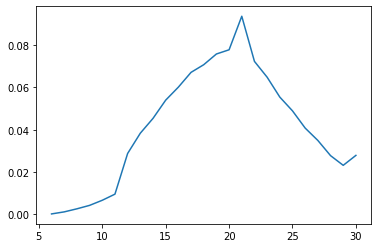

In [149]:
plt.plot(df.groupby(by=['number']).sum())

In [150]:
data = df.copy()

In [151]:
f2 = []
for x,y,z in df['cards']:
    p.cards = [x,y]
    p.count_no()
    f2.append([[x,y], p.cards_sum])

In [152]:
df2 = pd.DataFrame(f2, columns=['cards_two','cards_two_number'])

In [153]:
df2.shape

(2197, 2)

In [154]:
df.shape

(2197, 3)

In [125]:
# 記得千萬不要這樣做

# df = df + df2

In [170]:
data = df2.join(df)

In [171]:
data.head(10)

,cards_two,cards_two_number,cards,number,possibility
0,"[A, A]",12,"[A, A, A]",13,1.81e-04
1,"[A, A]",12,"[A, A, 2]",14,1.81e-04
2,"[A, A]",12,"[A, A, 3]",15,1.81e-04
3,"[A, A]",12,"[A, A, 4]",16,1.81e-04
4,"[A, A]",12,"[A, A, 5]",17,1.81e-04
5,"[A, A]",12,"[A, A, 6]",18,1.81e-04
6,"[A, A]",12,"[A, A, 7]",19,1.81e-04
7,"[A, A]",12,"[A, A, 8]",20,1.81e-04
8,"[A, A]",12,"[A, A, 9]",21,1.81e-04
9,"[A, A]",12,"[A, A, 10]",12,1.81e-04


In [196]:
# 應該分開討論會比較好，前兩張 11 以下的，肯定得加牌，不討論，從 11 開始

f2_11_pos = data[data['cards_two_number'] == 11].sum()['possibility']

In [197]:
f2_11 = data[data['cards_two_number'] == 11]

In [198]:
f2_11_new = f2_11.reset_index(drop=True)

In [199]:
f2_11_new.head()

,cards_two,cards_two_number,cards,number,possibility
0,"[2, 9]",11,"[2, 9, A]",12,4.83e-04
1,"[2, 9]",11,"[2, 9, 2]",13,4.83e-04
2,"[2, 9]",11,"[2, 9, 3]",14,4.83e-04
3,"[2, 9]",11,"[2, 9, 4]",15,4.83e-04
4,"[2, 9]",11,"[2, 9, 5]",16,4.83e-04


In [200]:
f2_11_new.shape

(104, 5)

In [205]:
t = np.zeros((104,)) + f2_11_pos

In [206]:
f2_11_new['sub_possibility'] = f2_11_new['possibility']/t

In [211]:
f2_11_new.drop(columns=['cards_two','cards_two_number','cards','possibility'], inplace=True)

In [225]:
f2_11_new.groupby(by=['number'], sort=True).sub_possibility.sum()

number
12    0.08
13    0.08
14    0.08
15    0.08
16    0.08
17    0.08
18    0.08
19    0.08
20    0.08
21    0.31
Name: sub_possibility, dtype: float64

## 11,爆 0%, 18-21~50%

有超過 50% 的機會，站在 18 點以上

這解釋了為何一定要 AA 分牌

In [250]:
# 依此類推
i = 12
p = data[data['cards_two_number'] == i].sum()['possibility']
d1 = data[data['cards_two_number'] == i]
d2 = d1.reset_index(drop=True)
s = d2.shape[0]
print('前兩張點數為 ', i, ' 時，總組合有 ', s , ' 種, Possibility = ', p)
d2['sub_p'] = d2['possibility'] / (np.zeros((s,))+p)
display(d2.groupby(by=['number'], sort=True).sub_p.sum())

前兩張點數為  12  時，總組合有  208  種, Possibility =  0.0940573152337858


number
12    7.70e-03
13    7.89e-02
14    7.89e-02
15    7.89e-02
16    7.89e-02
17    7.89e-02
18    7.57e-02
19    7.57e-02
20    7.57e-02
21    7.57e-02
22    2.95e-01
Name: sub_p, dtype: float64

## 12,爆30%,18-21~30%

## 13,爆34%,18-21~30%

## 14,爆38%,18-21~30%

## 15,爆47%,18-21~30%

## 16,爆51%,18-21~30%

## 17,爆56%,18-21~30%

In [256]:
# 依此類推
i = 17
p = data[data['cards_two_number'] == i].sum()['possibility']
d1 = data[data['cards_two_number'] == i]
d2 = d1.reset_index(drop=True)
s = d2.shape[0]
print('前兩張點數為 ', i, ' 時，總組合有 ', s , ' 種, Possibility = ', p)
d2['sub_p'] = d2['possibility'] / (np.zeros((s,))+p)
display(d2.groupby(by=['number'], sort=True).sub_p.sum())

前兩張點數為  17  時，總組合有  156  種, Possibility =  0.07529411764705882


number
12    0.01
13    0.01
14    0.01
15    0.01
16    0.01
17    0.05
18    0.08
19    0.08
20    0.08
21    0.08
22    0.06
23    0.06
24    0.06
25    0.06
26    0.06
27    0.26
Name: sub_p, dtype: float64